### Question 3: Clustering

In [6]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

--2021-02-20 13:06:57--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data.4’

iris.data.4         100%[===================>]   4.44K  --.-KB/s    in 0.01s   

2021-02-20 13:06:58 (438 KB/s) - ‘iris.data.4’ saved [4551/4551]



#### Examine data

In [7]:
import pandas as pd
import random
from tqdm import tqdm
data = pd.read_csv("iris.data", header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
def random_centroid(data):
    centroid = []
    for i in range(4):
        centroid.append(random.uniform(min(data[i]), max(data[i])))
    centroid = np.array(centroid)
    return centroid


def dst(x, c):
    return np.linalg.norm(x-c)


def quantization_error(p):
    total_clusters = 0
    total_single = 0
    for c in p["clusters"]:
        for dp in c["dps"]:
            total_single += dst(dp, c["centroid"])/len(c["dps"])
        total_clusters += total_single
    return total_clusters/len(p["clusters"])


In [16]:
# Represent cluster
ncentroids = 3
ncols = 4
nrows = len(data)
nparticles = 100

centroids = []
particles = []

v = 1
for p in range(nparticles):
    particle = {}
    for i in range(ncentroids):
        centroid = random_centroid(data)
        x = {"centroid":centroid, 
             "dps":np.zeros((1, 4)),
             "v":v,
             "loc":centroid}
        centroids.append(x)
    centroids = np.array(centroids)
    particle["clusters"] = centroids                  
    particle["fitness"] = quantization_error(particle)
    particles.append(particle)
    centroids = []
# Swarm of candidate clusterings
global_best = 100000
itr = 100

#For i in iterations
for i in tqdm(range(itr)):
    for p in particles:
        for dp in data.to_numpy():
            best = 10000                  # A very big number
            cluster = None
            for centroid in p["clusters"]:            # Calculate Euclidean distance to all centroids
                distance = dst(dp[:-1], centroid["centroid"])  
                if distance < best:
                    best = distance
                    cluster = centroid
            cluster["dps"] = np.vstack((cluster["dps"], dp[:-1]))     # Assign datavector to closest centroid
        
        p["fitness"] = quantization_error(p)             # Quantization error fitness of particle
    
        if p["fitness"] < global_best:
            global_best = p["fitness"]
    
    for p in particles:
        for c in p["clusters"]:     # For each particle update centroid 
            vnew = 0.73*c["v"]+1.5*(c["loc"]-c["centroid"])+1.5*(global_best-x["centroid"])
            c["v"] = vnew
            c["centroid"] = c["centroid"] + vnew
            
        if p["fitness"] > quantization_error(p):
            for c in p["clusters"]:
                c["loc"] = c["centroid"]
    
    for p in particles:
        if i < itr-2:
            for c in p["clusters"]:
                c["dps"] = np.zeros((1, 4))

        


100%|██████████| 100/100 [01:27<00:00,  1.14it/s]


Quantization error for fittest particle: 6.821462522300088


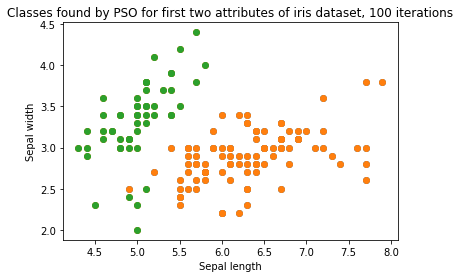

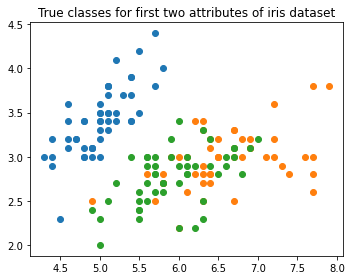

In [18]:
best = 100000
for p in particles:
    if p["fitness"] < best:
        best_p = p

print("Quantization error for fittest particle:", best_p["fitness"])
        

for c in best_p["clusters"]:
    plt.scatter(c["dps"][1:,0], c["dps"][1:,1])
# The indices of the features that we are plotting
plt.ylabel("Sepal width")
plt.xlabel("Sepal length")
plt.title("Classes found by PSO for first two attributes of iris dataset, 100 iterations")
x_index = 0
y_index = 1


plt.figure(figsize=(5, 4))
setosa = data[data[4] == "Iris-setosa"].to_numpy()
virginica =  data[data[4] == "Iris-virginica"].to_numpy()
versicolor =  data[data[4] == "Iris-versicolor"].to_numpy()

for iris in (setosa, virginica, versicolor):
    plt.scatter(iris[:, x_index], iris[:, y_index])

plt.title("True classes for first two attributes of iris dataset")
plt.tight_layout()
plt.show()

In [19]:
nclusters = 3
iterations = 10
clusters = []
for i in range(nclusters):
    cluster = {}
    cluster["centroid"] = random_centroid(data)
    cluster["data"] = np.zeros((1,4))
    clusters.append(cluster)

for i in tqdm(range(iterations)):
    for vector in data.to_numpy():
        best = 10000
        centroid = None
        for cluster in clusters:
            new_dst = dst(vector[:-1], cluster["centroid"])
            if new_dst < best:
                best = new_dst
                best_centroid = cluster
        best_centroid["data"] = np.vstack((best_centroid["data"], vector[:-1]))
    
    for cluster in clusters:
        cluster["centroid"] = cluster["data"].mean(axis=0)
        if i < iterations-1:
            cluster["data"] = np.zeros((1,4))



100%|██████████| 10/10 [00:00<00:00, 151.17it/s]


1.4749877945292666


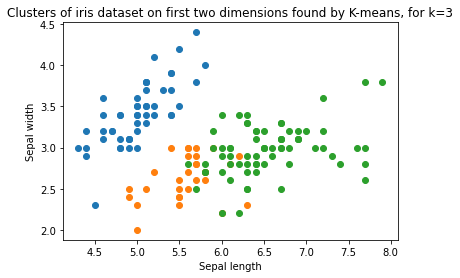

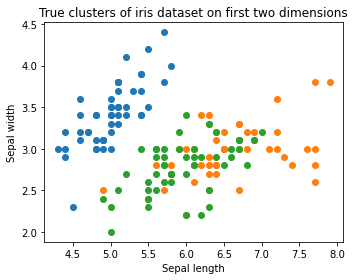

In [15]:
def quantization_error_kmeans(clusters):
    total_clusters = 0
    total_single = 0
    for c in clusters:
        for dp in c["data"]:
            total_single += dst(dp, c["centroid"])/len(c["data"])
        total_clusters += total_single
    return total_clusters/len(clusters)

print(quantization_error_kmeans(clusters))

for c in clusters:
    plt.scatter(c["data"][1:,0], c["data"][1:,1])
plt.ylabel("Sepal width")
plt.xlabel("Sepal length")
plt.title("Clusters of iris dataset on first two dimensions found by K-means, for k=3, 10 iterations")
plt.show()
plt.figure(figsize=(5, 4))
setosa = data[data[4] == "Iris-setosa"].to_numpy()
virginica =  data[data[4] == "Iris-virginica"].to_numpy()
versicolor =  data[data[4] == "Iris-versicolor"].to_numpy()

for iris in (setosa, virginica, versicolor):
    plt.scatter(iris[:, x_index], iris[:, y_index])
plt.ylabel("Sepal width")
plt.xlabel("Sepal length")
plt.title("True clusters of iris dataset on first two dimensions")
plt.tight_layout()
plt.show()